# Surprise Housing - Advanced Regression


## Problem Statement
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a **price below their actual values and flip them on at a higher price**. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to **build a regression model using regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The Surprise Housing wants to know:**

1. Which variables are significant in predicting the price of a house
2. How well those variables describe the price of a house
3. Also, determine the optimal value of lambda for ridge and lasso regression

******************

### Business Goal 
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

******************

### Procedure:
1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
    - Univarent Analysis
    - Bivarent analysis
    - Multivarent Analysis
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. step 7: Applying Ridge and Lasso

In [1]:
# importing all the important
import numpy as np #Libraray used for numerical python
import pandas as pd #Libraray used for dataframe

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt #Libraray used for plotting
import seaborn as sns #Libraray used for data visualization

# sklearn Libraray used for classification, predictive analytics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
import random

# hide warnings
import warnings #Libraray used to ignore warnings due to version problems
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, mean_squared_error

## Step 1: Reading and Understanding the Data (EDA)
a. Cleaning Data

In [2]:
surprise_house_data = pd.read_csv("data/train.csv", encoding = 'utf-8')
surprise_house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the dimensions
surprise_house_data.shape

(1460, 81)

### a. Cleaning Data

In [4]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100, 2)
missing_value.loc[missing_value>20].sort_values()

FireplaceQu    47.26
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64

- As we can see that five columns have more than 45% of missing values and will drop these 5 columns

In [5]:
surprise_house_data = surprise_house_data.drop(missing_value.loc[missing_value>20].index, axis=1)
surprise_house_data.shape

(1460, 76)

In [6]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
LotFrontage     17.74
dtype: float64

- Here we can see LotFrontage having 17.74% missing value. And will get some insights 
- LotFrontage: Linear feet of street-connected to property

In [7]:
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [8]:
# To get the description of the dataset
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- We can clearly see that, we cannot impute any values in it, we will remove this variable cause it has 17% missing values

In [9]:
surprise_house_data = surprise_house_data.drop("LotFrontage", axis=1)
surprise_house_data.shape

(1460, 75)

In [10]:
missing_value = round( (surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

- Here we can see that some of the variables have an exact same missing value of 5.55% 
- We will go through it and get some insights

In [11]:
missing_col = missing_value[missing_value>5].index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n")

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0

In [12]:
missing5_per = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                           & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull() 
                           & surprise_house_data[missing_col[4]].isnull()) ]
missing5_per.shape

(81, 75)

In [13]:
round(missing5_per.shape[0]/surprise_house_data.shape[0] *100, 2)

5.55

- We found that **5.5%** of the missing data from **'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'** are **from the same Row.**
- We cannot remove it because here when we use isnull(), it takes **NA as NULL**
- But as per **Metadata**, they have mentioned **NA is "No Garage"**
- We cannot remove the category. Insteed we will give diffent name for it like **NO-GA than NA**
- However, **'GarageYrBlt'** is numeric(Date- Year garage was built), so for **NA**, we can use **YearBuilt** for it

In [14]:
for col in missing_col:
    if col != "GarageYrBlt":
        surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-GA" if x!=x else x)

In [15]:
def re_NA_t_BLDyr(year, buildyear):
    if year != year:
        return buildyear
    return year

In [16]:
surprise_house_data["GarageYrBlt"] = list(map(re_NA_t_BLDyr, surprise_house_data["GarageYrBlt"], surprise_house_data["YearBuilt"]))

### Rechecking the Missing Values

In [17]:
missing_value = round(surprise_house_data.isnull().sum()/surprise_house_data.shape[0] *100 ,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
dtype: float64

- Here we can see that some of the variables have an missing value of 2.5 and above.
- We will go through it and get some insights

In [18]:
missing_col = missing_value.loc[missing_value>2].sort_values().index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n\n")

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 




In [19]:
missing_per02 = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                            & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull()
                            & surprise_house_data[missing_col[4]].isnull()
                           )]
missing_per02.shape

(37, 75)

In [20]:
missing_per02.shape[0]/surprise_house_data.shape[0]*100

2.5342465753424657

In [21]:
missing_col

Index(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'], dtype='object')

- Again we can see that **2.5%** of the missing data from **'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'** are **from the same Row**
- But we can't remove it because here when we use isnull(), it takes **NA as null** 
- But as per **Metadata** they have mentioned **NA is "No Basement"**
- So we basically can't remove this category
- Insteed we will give diffent name for it like **NO-BA than NA**

In [22]:
for col in missing_col:
    surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-BA" if x!=x else x )
surprise_house_data.shape

(1460, 75)

In [23]:
missing_value = round (surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100, 2)
missing_value.loc[missing_value>0].sort_values()

Electrical    0.07
MasVnrType    0.55
MasVnrArea    0.55
dtype: float64

In [24]:
missing_col = missing_value.loc[missing_value>0].sort_values().index
missing_col

Index(['Electrical', 'MasVnrType', 'MasVnrArea'], dtype='object')

- Here we can see that these three variables have only 0.55% missing values, so we can directly remove them cause we will still be left with more data. 

In [25]:
surprise_house_data = surprise_house_data[~(surprise_house_data[missing_col[0]].isnull() | surprise_house_data[missing_col[1]].isnull() 
           | surprise_house_data[missing_col[2]].isnull() 
           )]
surprise_house_data.shape

(1451, 75)

In [26]:
missing_value = round( surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100,2)
missing_value[missing_value>0].sort_values()

Series([], dtype: float64)

In [27]:
# Removing ID columns
surprise_house_data = surprise_house_data.drop("Id", axis=1)
surprise_house_data.shape

(1451, 74)

In [28]:
round(surprise_house_data.shape[0]/1460 *100 ,2)

99.38

- No missing values, only 0.62% are removed, and seven columns are removed.

## Step 2: Visualising the Data

In [29]:
# Let's narrow down on the columns and drop all unnecessary variables
surprise_house_data.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
LandSlope           3
BsmtHalfBath        3
ExterQual           4
MasVnrType          4
GarageFinish        4
Fireplaces          4
KitchenAbvGr        4
KitchenQual         4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
BsmtQual            5
Electrical          5
YrSold              5
HeatingQC           5
LotConfig           5
GarageCars          5
MSZoning            5
ExterCond           5
BsmtExposure        5
BldgType            5
BsmtCond            5
SaleCondition       6
Heating             6
GarageQual          6
GarageCond          6
RoofStyle           6
Foundation          6
BsmtFinType1        7
BsmtFinType2        7
GarageType          7
Functional          7
Condition2          8
HouseStyle          8
BedroomAbvGr        8
PoolArea            8
RoofMatl            8
Condition1          9
SaleType            9
OverallCon

- Here we can clearly see each variable has at least **two unique values**, so there is no need to remove any more variables

#### Dividing the Data into categorical columns and numeric columns for better visulaization

In [30]:
surprise_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

In [31]:
# Getting only categorical variables
categorical = surprise_house_data.select_dtypes(include=['object'])
print(categorical.columns,"\n", categorical.shape[1])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 
 38


In [32]:
# Getting only numeric variables. 
numeric = surprise_house_data.select_dtypes(exclude=['object'])
print(numeric.columns, "\n",numeric.shape[1])

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 36


- We have 38 categorical variables and 36 numeric variables.

###  2. a. Univarent Analysis

In [33]:
# This can be used to plot multiple barPlots graphs.
def barplots(idx, col, figsize=(7,7)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    keys = surprise_house_data[col].value_counts().keys()
    values = surprise_house_data[col].value_counts().values
    sns.barplot(keys, values, palette="nipy_spectral")
    plt.show()

In [34]:
unique_cat = categorical.nunique().sort_values()
unique_cat

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
LandSlope         3
KitchenQual       4
ExterQual         4
MasVnrType        4
LandContour       4
LotShape          4
GarageFinish      4
Electrical        5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
GarageCond        6
GarageQual        6
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

<Figure size 432x288 with 0 Axes>

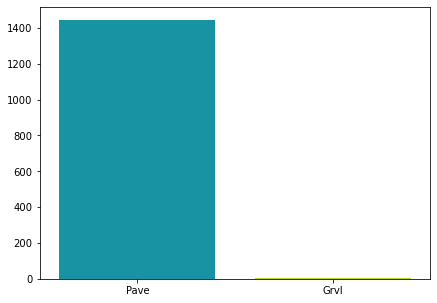

<Figure size 432x288 with 0 Axes>

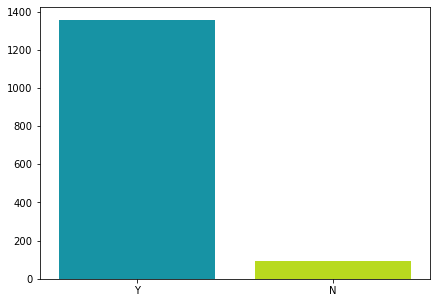

<Figure size 432x288 with 0 Axes>

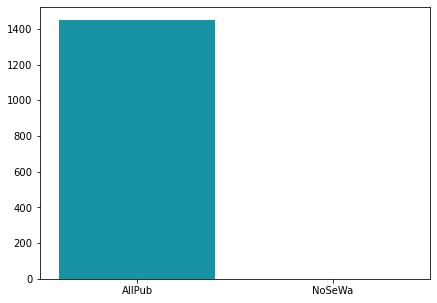

<Figure size 432x288 with 0 Axes>

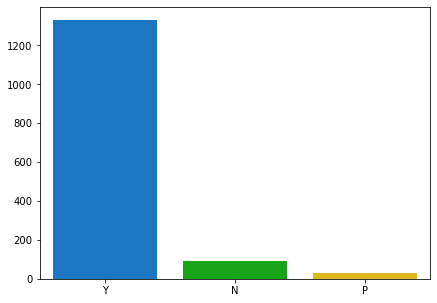

<Figure size 432x288 with 0 Axes>

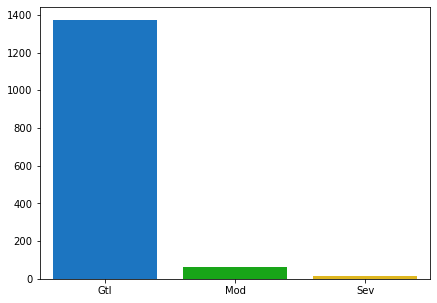

<Figure size 432x288 with 0 Axes>

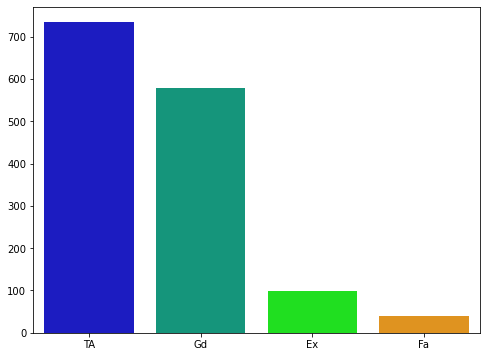

<Figure size 432x288 with 0 Axes>

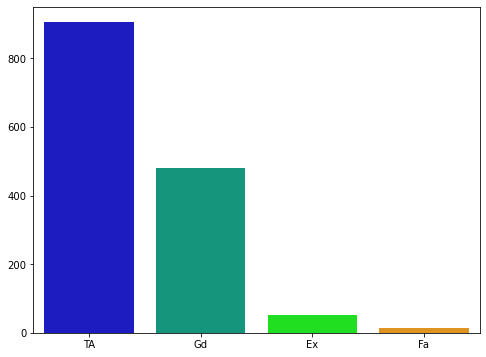

<Figure size 432x288 with 0 Axes>

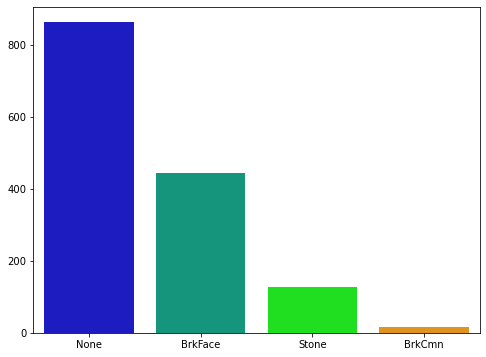

<Figure size 432x288 with 0 Axes>

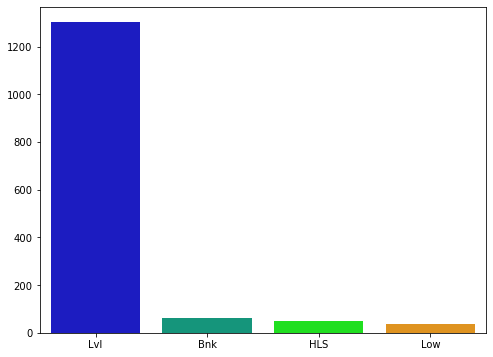

<Figure size 432x288 with 0 Axes>

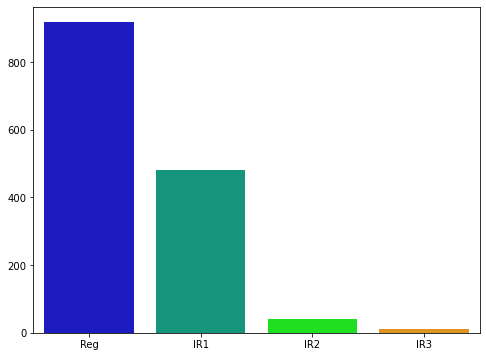

<Figure size 432x288 with 0 Axes>

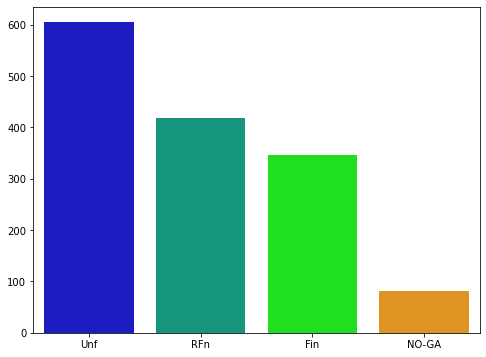

<Figure size 432x288 with 0 Axes>

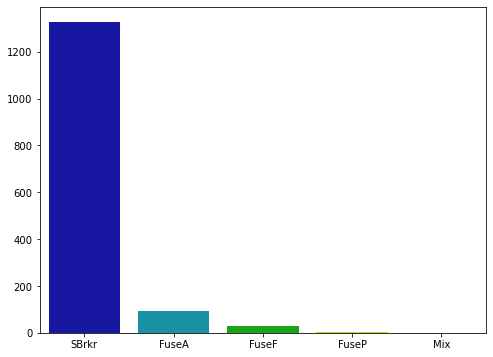

<Figure size 432x288 with 0 Axes>

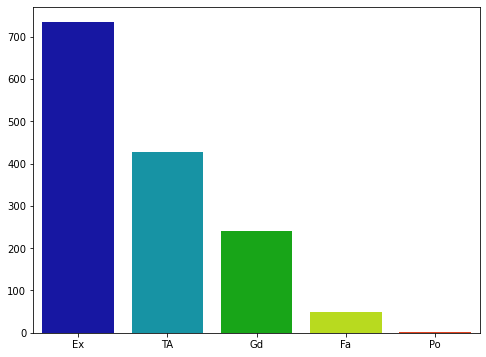

<Figure size 432x288 with 0 Axes>

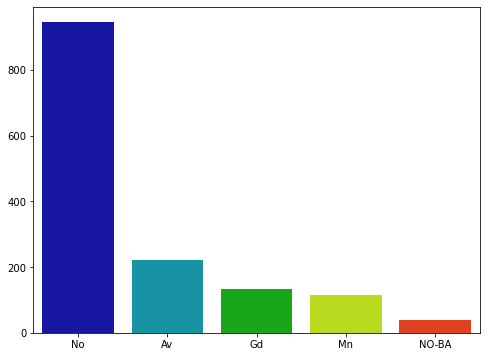

<Figure size 432x288 with 0 Axes>

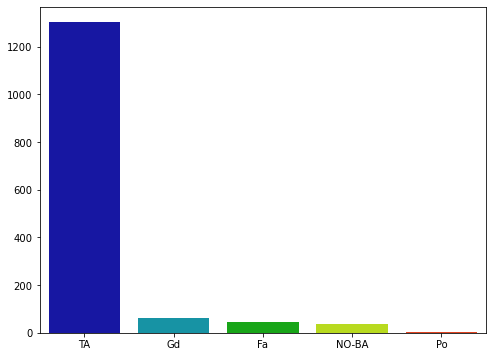

<Figure size 432x288 with 0 Axes>

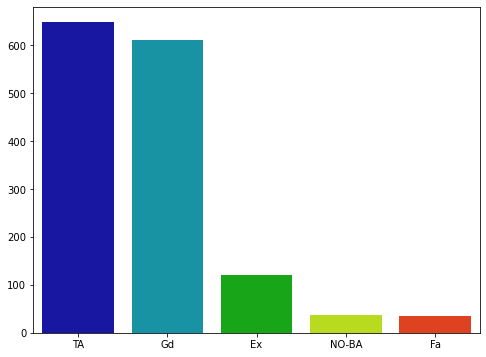

<Figure size 432x288 with 0 Axes>

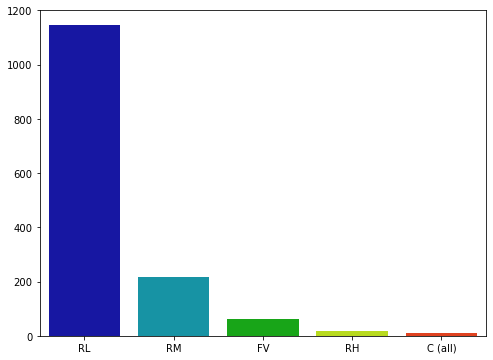

<Figure size 432x288 with 0 Axes>

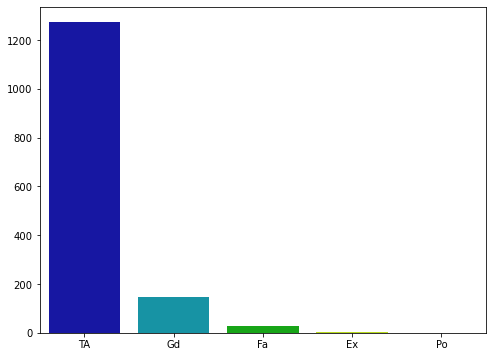

<Figure size 432x288 with 0 Axes>

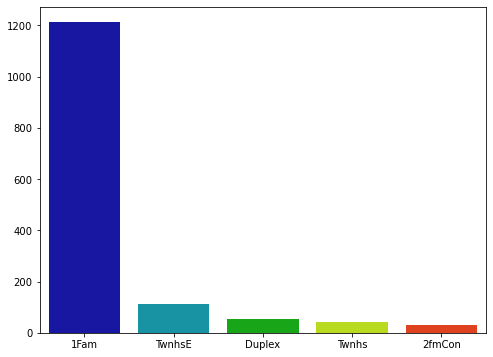

<Figure size 432x288 with 0 Axes>

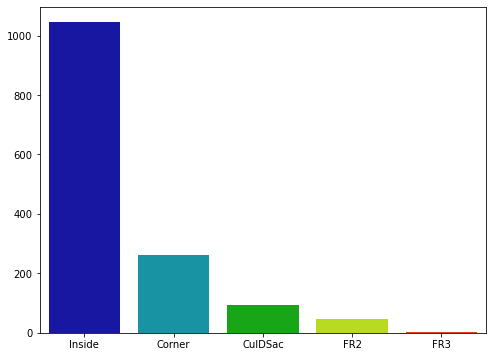

<Figure size 432x288 with 0 Axes>

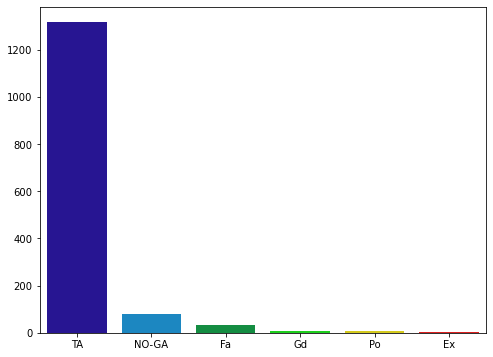

<Figure size 432x288 with 0 Axes>

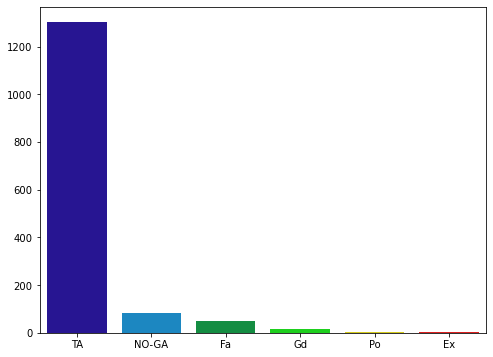

<Figure size 432x288 with 0 Axes>

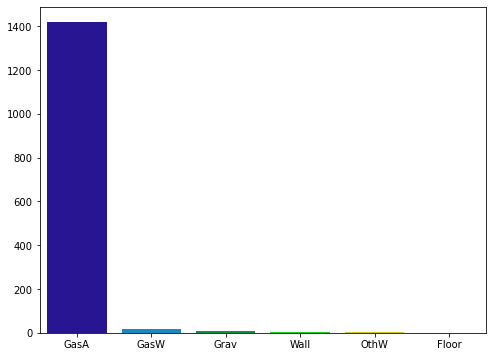

<Figure size 432x288 with 0 Axes>

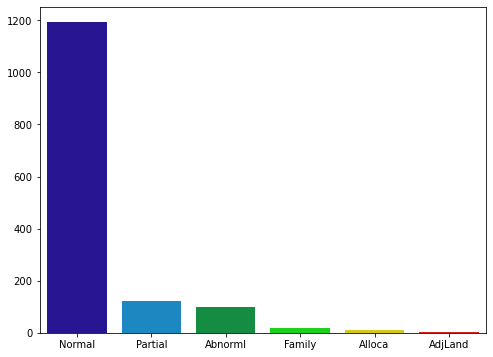

<Figure size 432x288 with 0 Axes>

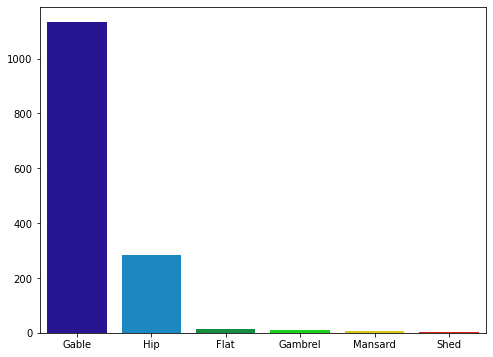

<Figure size 432x288 with 0 Axes>

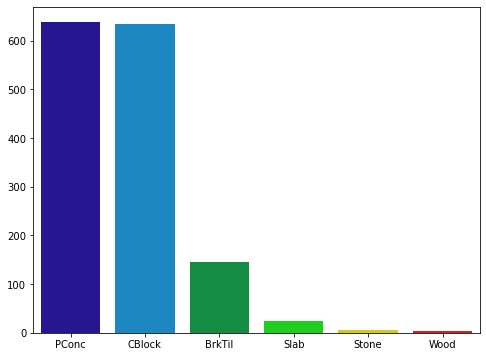

<Figure size 432x288 with 0 Axes>

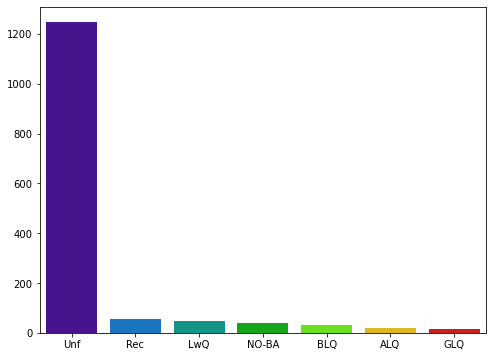

<Figure size 432x288 with 0 Axes>

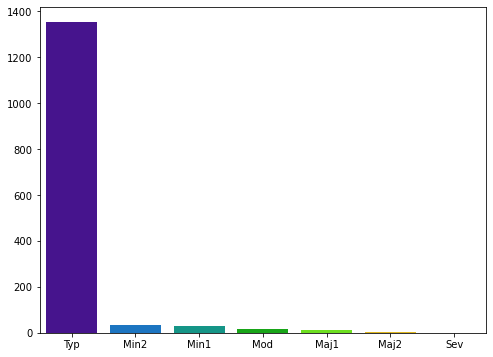

<Figure size 432x288 with 0 Axes>

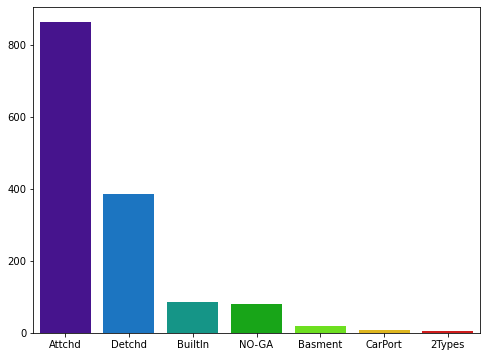

<Figure size 432x288 with 0 Axes>

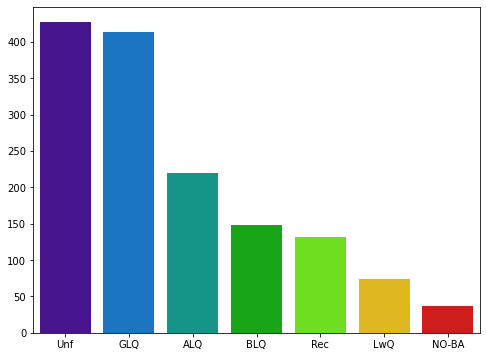

<Figure size 432x288 with 0 Axes>

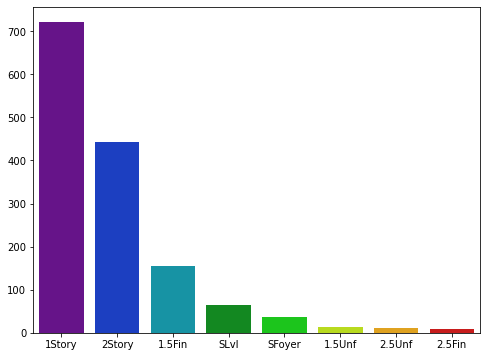

<Figure size 432x288 with 0 Axes>

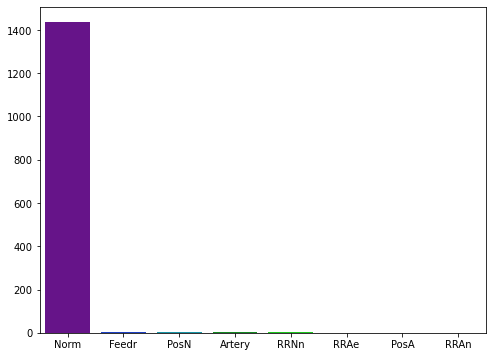

<Figure size 432x288 with 0 Axes>

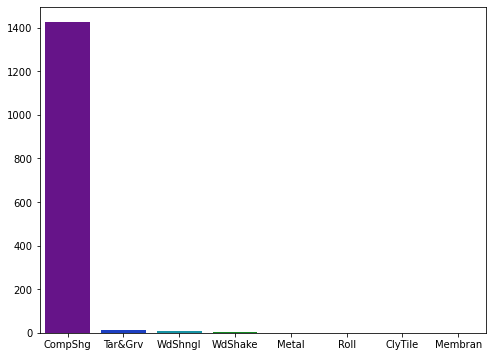

<Figure size 432x288 with 0 Axes>

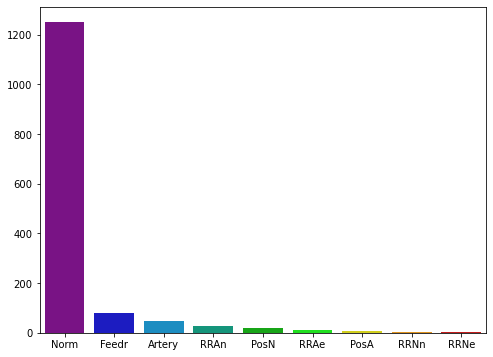

<Figure size 432x288 with 0 Axes>

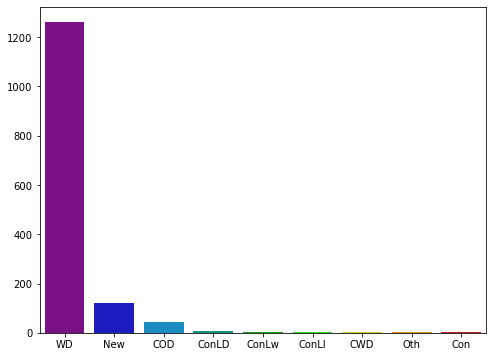

<Figure size 432x288 with 0 Axes>

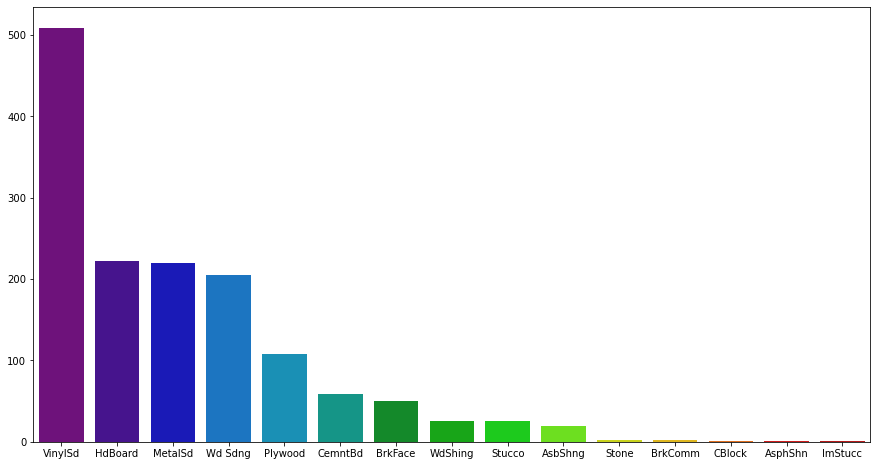

<Figure size 432x288 with 0 Axes>

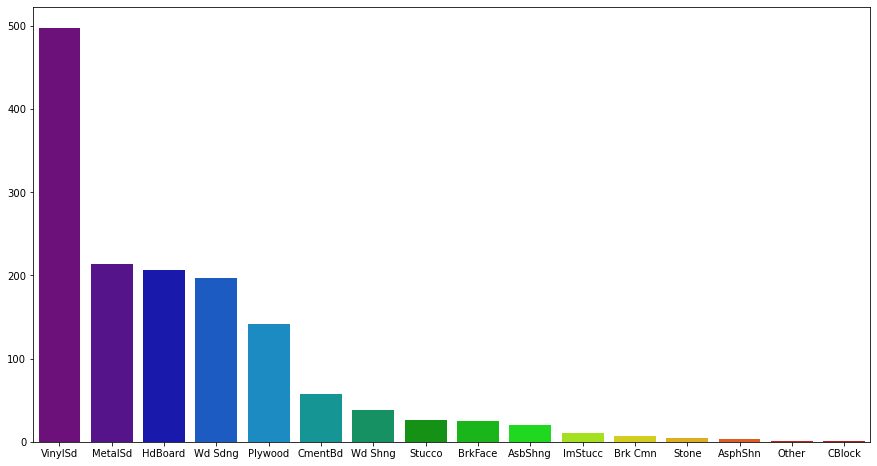

<Figure size 432x288 with 0 Axes>

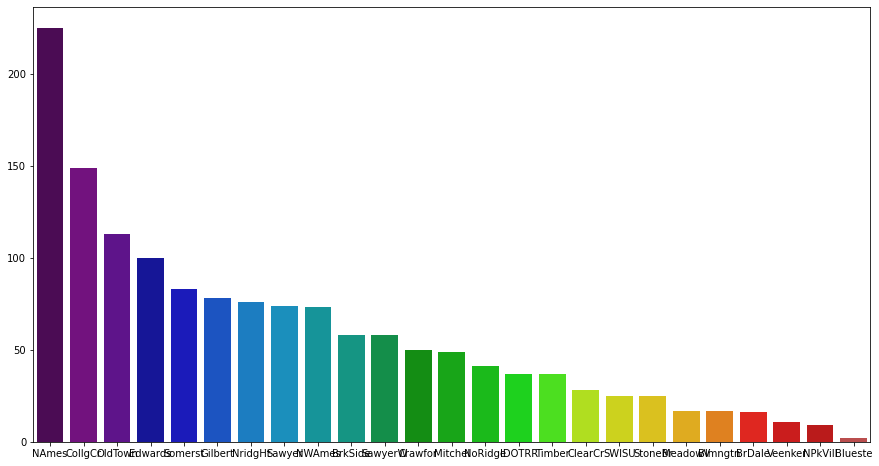

In [35]:
# Plotting box plot on all the categorical variables
for i, val in enumerate(unique_cat):
    if val<4:
        barplots(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        barplots(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        barplots(i, unique_cat.keys()[i], figsize = (15,8))

In [36]:
def boxplots(idx, col, figsize=(10,4)):
    """
    This can be used to plot multiple boxplots graphs.
    """
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(surprise_house_data[col], palette=pat[random.randint(0,len(pat)-1)])
    plt.show()

<Figure size 432x288 with 0 Axes>

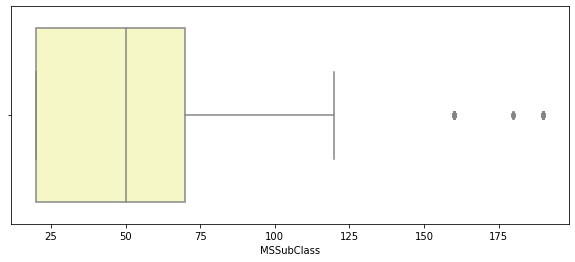

<Figure size 432x288 with 0 Axes>

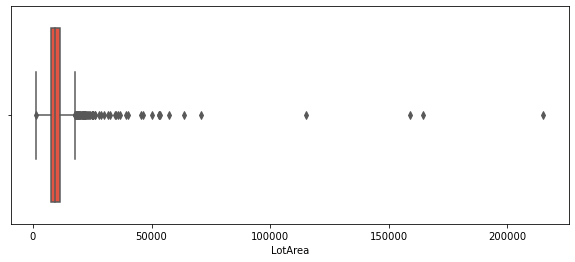

<Figure size 432x288 with 0 Axes>

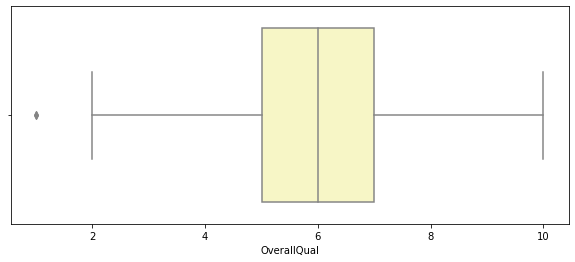

<Figure size 432x288 with 0 Axes>

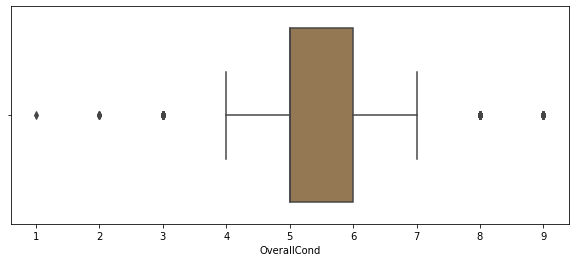

<Figure size 432x288 with 0 Axes>

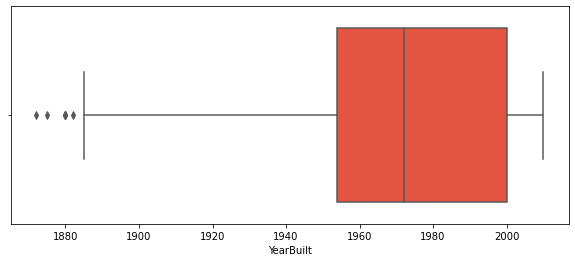

<Figure size 432x288 with 0 Axes>

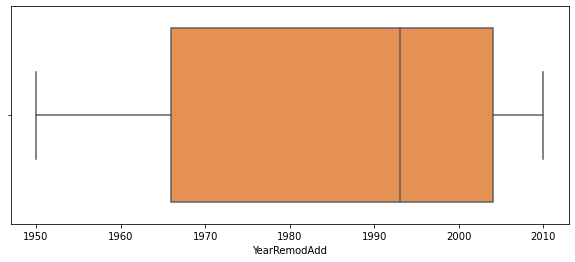

<Figure size 432x288 with 0 Axes>

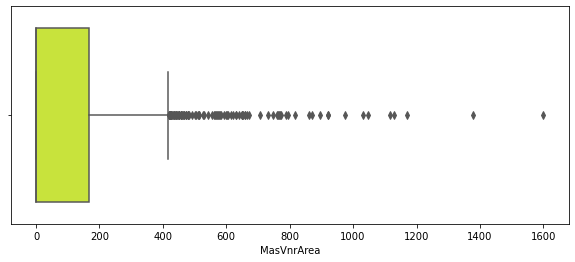

<Figure size 432x288 with 0 Axes>

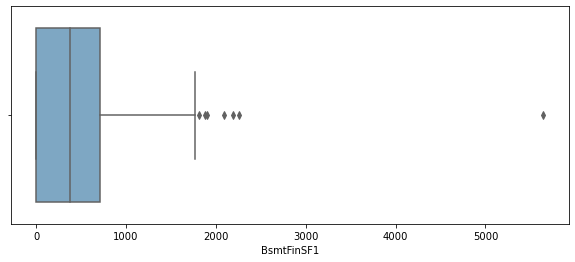

<Figure size 432x288 with 0 Axes>

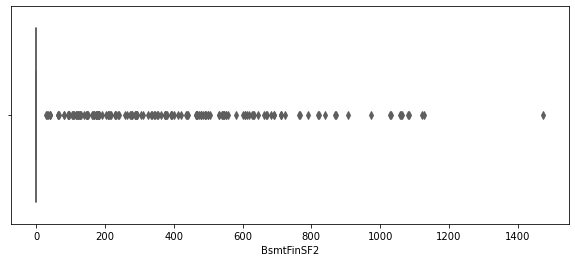

<Figure size 432x288 with 0 Axes>

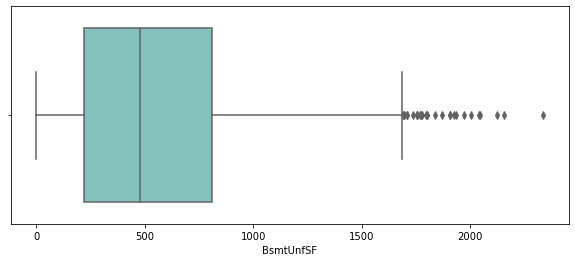

<Figure size 432x288 with 0 Axes>

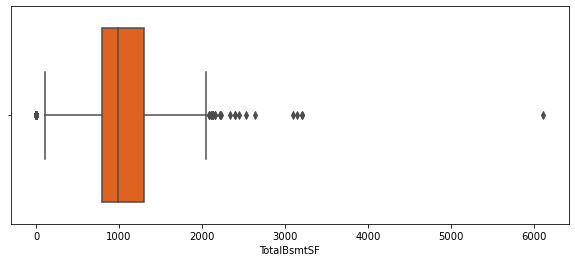

<Figure size 432x288 with 0 Axes>

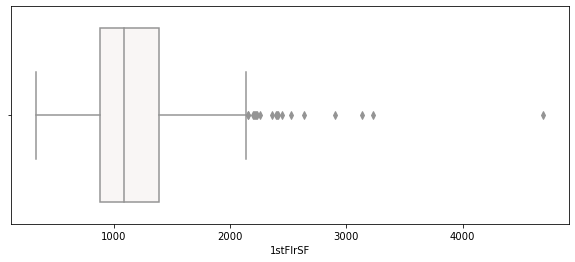

<Figure size 432x288 with 0 Axes>

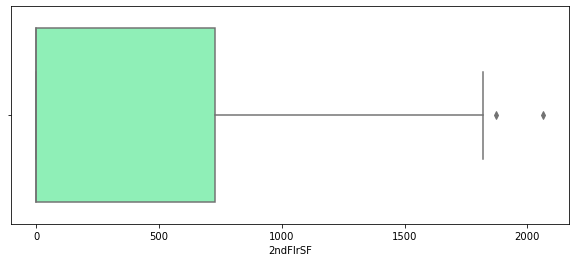

<Figure size 432x288 with 0 Axes>

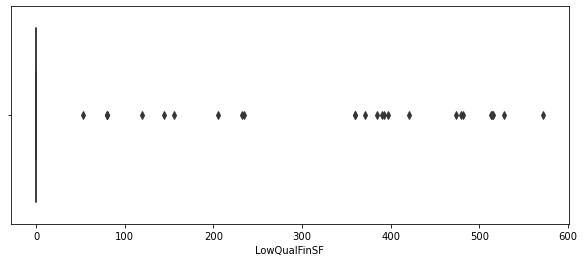

<Figure size 432x288 with 0 Axes>

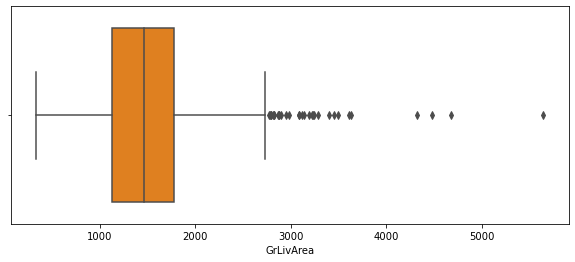

<Figure size 432x288 with 0 Axes>

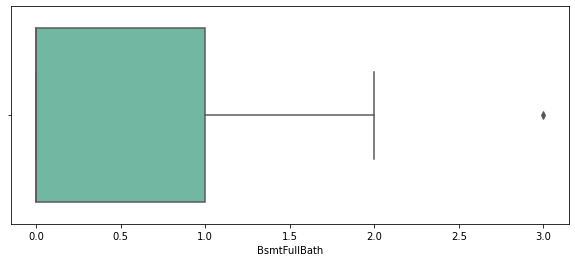

<Figure size 432x288 with 0 Axes>

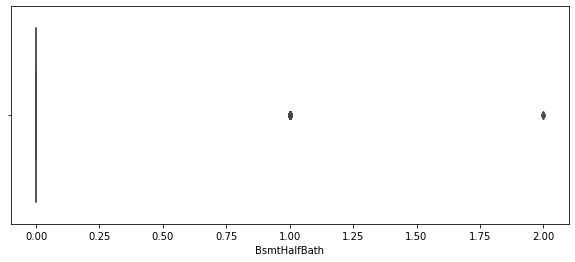

<Figure size 432x288 with 0 Axes>

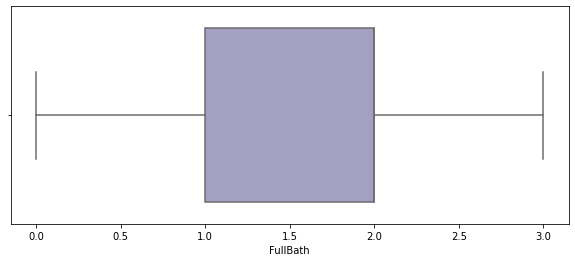

<Figure size 432x288 with 0 Axes>

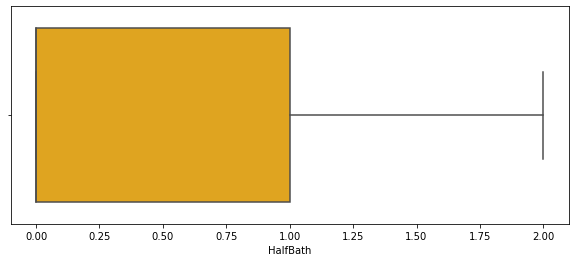

<Figure size 432x288 with 0 Axes>

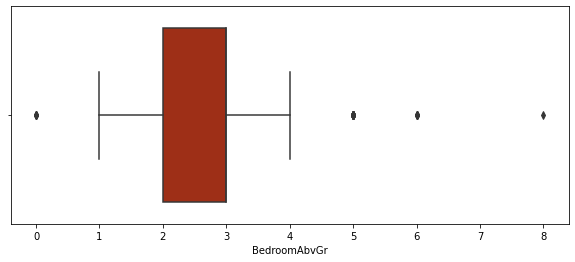

<Figure size 432x288 with 0 Axes>

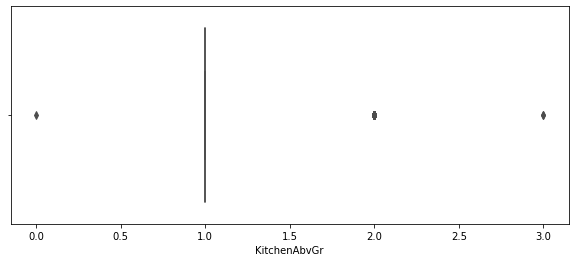

<Figure size 432x288 with 0 Axes>

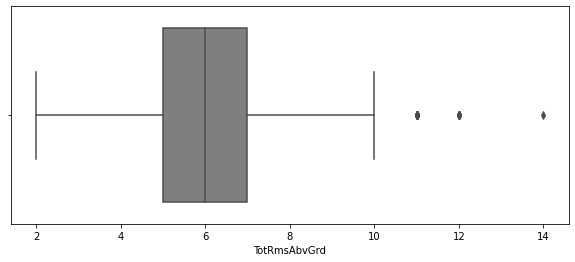

<Figure size 432x288 with 0 Axes>

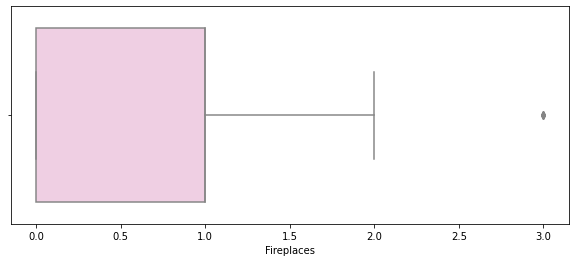

<Figure size 432x288 with 0 Axes>

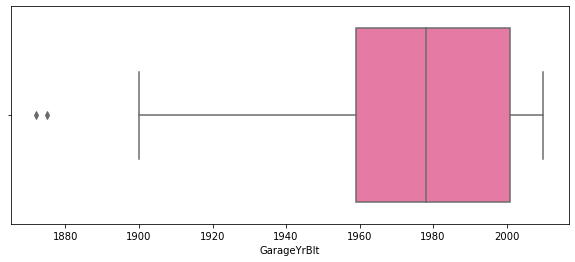

<Figure size 432x288 with 0 Axes>

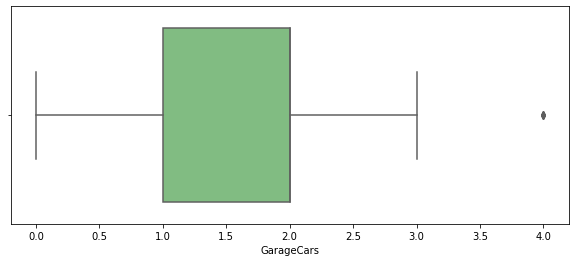

<Figure size 432x288 with 0 Axes>

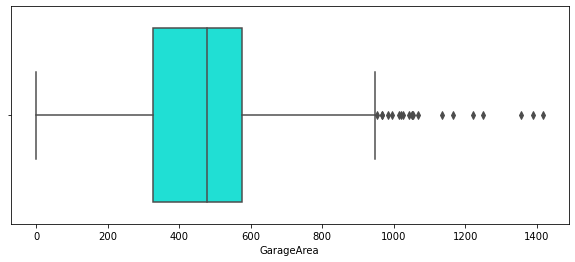

<Figure size 432x288 with 0 Axes>

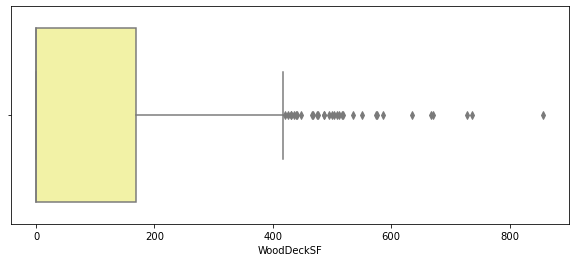

<Figure size 432x288 with 0 Axes>

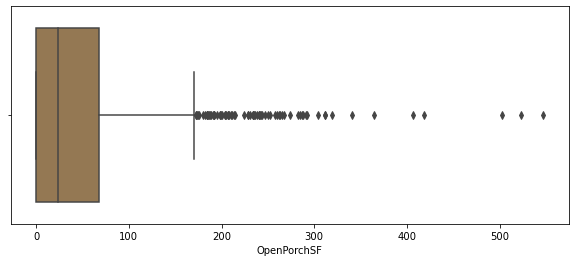

<Figure size 432x288 with 0 Axes>

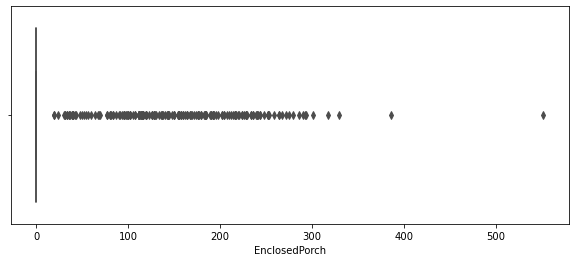

<Figure size 432x288 with 0 Axes>

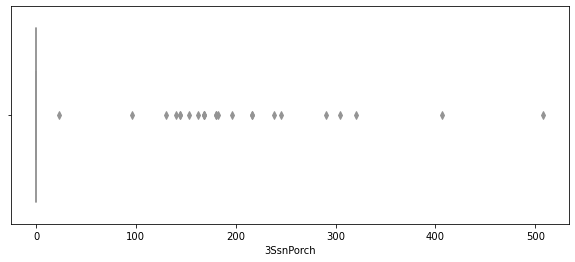

<Figure size 432x288 with 0 Axes>

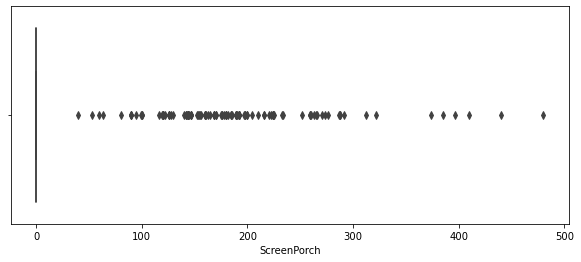

<Figure size 432x288 with 0 Axes>

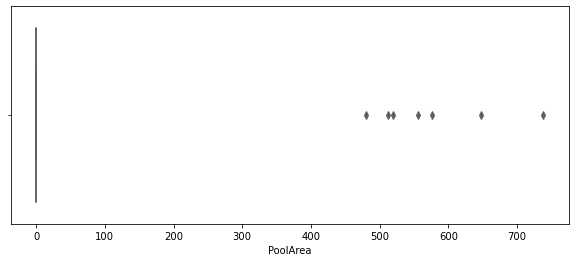

<Figure size 432x288 with 0 Axes>

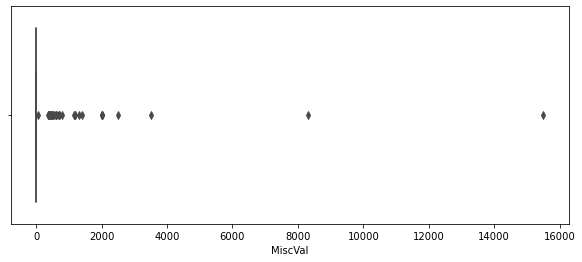

<Figure size 432x288 with 0 Axes>

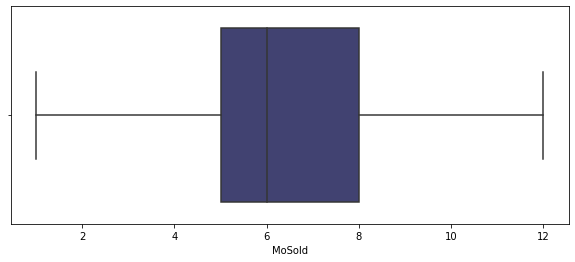

<Figure size 432x288 with 0 Axes>

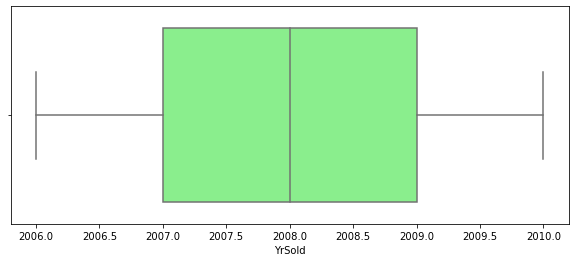

<Figure size 432x288 with 0 Axes>

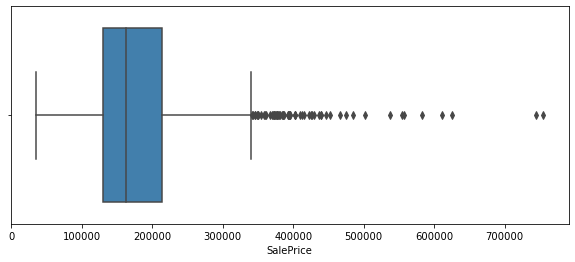

In [37]:
pat = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
for i, col in enumerate(numeric.columns):
    boxplots(i, col)